# Hybrid circuit (500Hz cable BPF)

In [17]:
import os
import matplotlib.pyplot as plt
import numpy as np
import math
import random

# Parameters
top_level=f'{os.getcwd()}/..'
path    = f'{top_level}/data/hybrid_waveform.npy'

waveform=np.load(path)

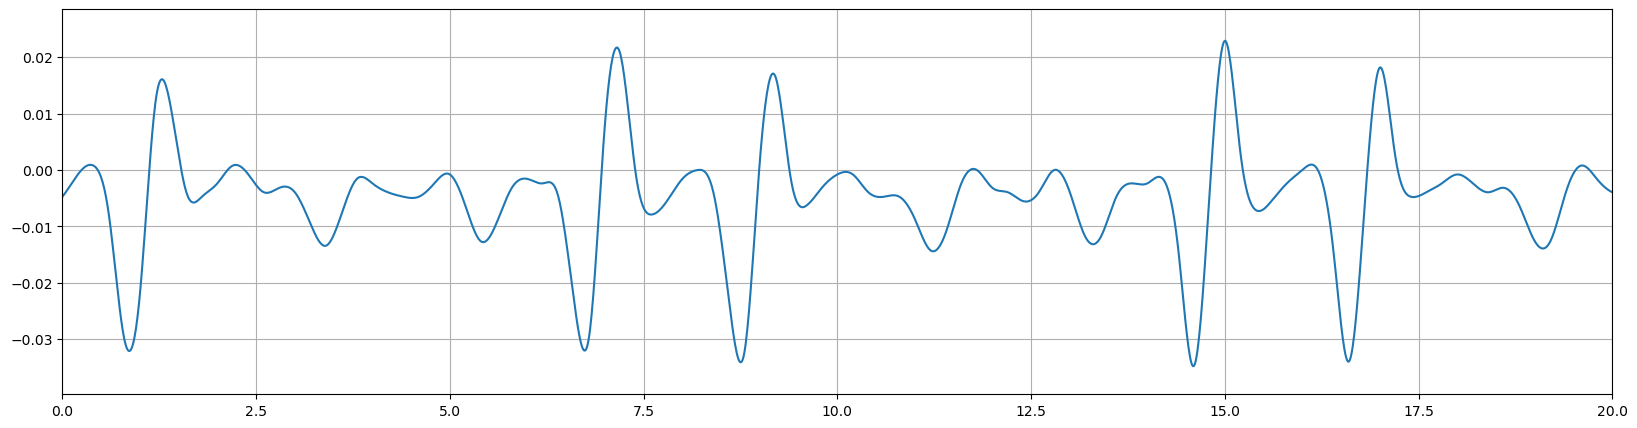

In [21]:
t=np.arange(0,len(waveform[0]))*10e-3
plt.figure(figsize=(20,5))
plt.plot(t,waveform[0])
plt.xlim(0,20)
plt.grid()
plt.show()

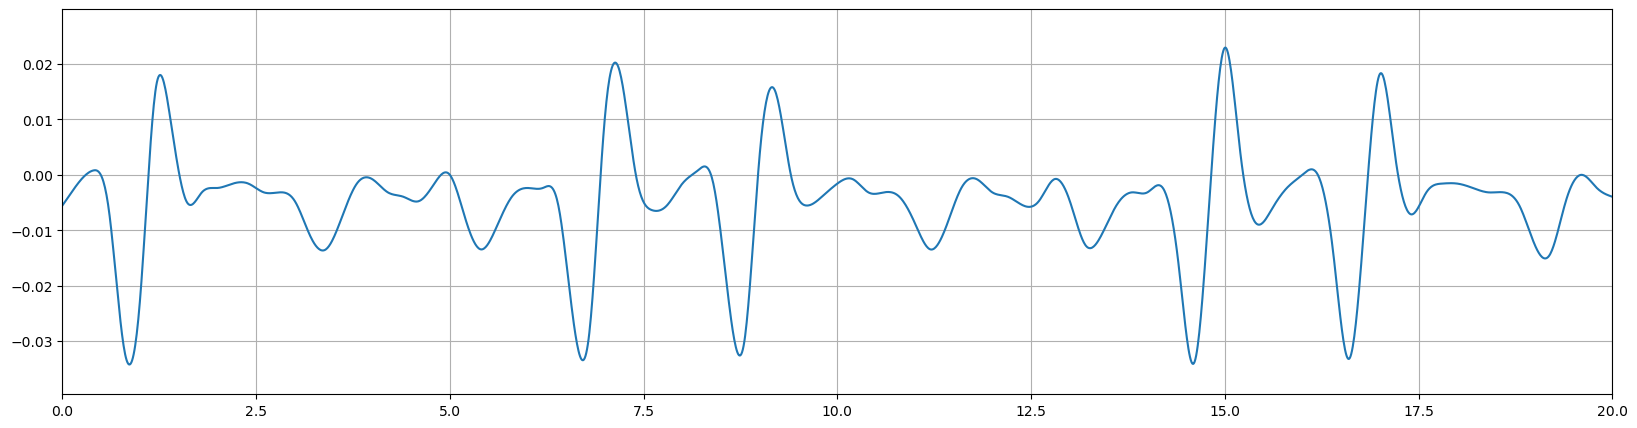

In [22]:
t=np.arange(0,len(waveform[1]))*10e-3
plt.figure(figsize=(20,5))
plt.plot(t,waveform[1])
plt.xlim(0,20)
plt.grid()
plt.show()

In [74]:
h = [
    0.000000000000000000,
    0.000000616770332650,
    0.000002549635021818,
    0.000005728267352965,
    0.000009811799467181,
    0.000014189975844758,
    0.000018004467511079,
    0.000020191228569673,
    0.000019543929464478,
    0.000014797476454717,
    0.000004729430117159,
    -0.000011724203757601,
    -0.000035343765148512,
    -0.000066497702390987,
    -0.000105019035717396,
    -0.000150095373347144,
    -0.000200182105041612,
    -0.000252948690997799,
    -0.000305267656847485,
    -0.000353254902664462,
    -0.000392368175556237,
    -0.000417568028534577,
    -0.000423542334691192,
    -0.000404991546843302,
    -0.000356967551097851,
    -0.000275254377692488,
    -0.000156774472303968,
    0.000000000000000000,
    0.000194654924633415,
    0.000424487791876528,
    0.000684235077575752,
    0.000965901297550738,
    0.001258715678991929,
    0.001549238681932089,
    0.001821635094451181,
    0.002058123236821410,
    0.002239601179373175,
    0.002346441156621078,
    0.002359432998029152,
    0.002260846928557149,
    0.002035576112038472,
    0.001672310435934203,
    0.001164685876561792,
    0.000512348902781982,
    -0.000278126746694626,
    -0.001192532579742413,
    -0.002208584496427941,
    -0.003295798189562315,
    -0.004415719480531432,
    -0.005522534420984364,
    -0.006564067751327779,
    -0.007483160357261186,
    -0.008219397522783304,
    -0.008711140958791809,
    -0.008897799761500307,
    -0.008722259599004236,
    -0.008133376462415590,
    -0.007088432072408103,
    -0.005555443172896996,
    -0.003515216945584909,
    -0.000963049887295778,
    0.002090022300929761,
    0.005616501227505299,
    0.009572286802491682,
    0.013897157909382193,
    0.018515882520286211,
    0.023339940154371273,
    0.028269812532764414,
    0.033197772344019119,
    0.038011076473507897,
    0.042595450052711072,
    0.046838732286456339,
    0.050634545048524715,
    0.053885841277664041,
    0.056508192550203513,
    0.058432683840440432,
    0.059608298085711983,
    0.060003693134018272,
    0.059608298085711983,
    0.058432683840440432,
    0.056508192550203513,
    0.053885841277664048,
    0.050634545048524729,
    0.046838732286456339,
    0.042595450052711072,
    0.038011076473507897,
    0.033197772344019126,
    0.028269812532764421,
    0.023339940154371283,
    0.018515882520286214,
    0.013897157909382195,
    0.009572286802491682,
    0.005616501227505300,
    0.002090022300929761,
    -0.000963049887295778,
    -0.003515216945584909,
    -0.005555443172896996,
    -0.007088432072408106,
    -0.008133376462415593,
    -0.008722259599004236,
    -0.008897799761500307,
    -0.008711140958791809,
    -0.008219397522783306,
    -0.007483160357261186,
    -0.006564067751327774,
    -0.005522534420984365,
    -0.004415719480531433,
    -0.003295798189562314,
    -0.002208584496427943,
    -0.001192532579742414,
    -0.000278126746694626,
    0.000512348902781982,
    0.001164685876561792,
    0.001672310435934205,
    0.002035576112038472,
    0.002260846928557147,
    0.002359432998029152,
    0.002346441156621079,
    0.002239601179373175,
    0.002058123236821412,
    0.001821635094451183,
    0.001549238681932089,
    0.001258715678991929,
    0.000965901297550738,
    0.000684235077575753,
    0.000424487791876528,
    0.000194654924633415,
    0.000000000000000000,
    -0.000156774472303968,
    -0.000275254377692488,
    -0.000356967551097851,
    -0.000404991546843302,
    -0.000423542334691193,
    -0.000417568028534576,
    -0.000392368175556237,
    -0.000353254902664462,
    -0.000305267656847485,
    -0.000252948690997799,
    -0.000200182105041612,
    -0.000150095373347145,
    -0.000105019035717397,
    -0.000066497702390987,
    -0.000035343765148512,
    -0.000011724203757601,
    0.000004729430117159,
    0.000014797476454717,
    0.000019543929464478,
    0.000020191228569673,
    0.000018004467511079,
    0.000014189975844758,
    0.000009811799467181,
    0.000005728267352965,
    0.000002549635021818,
    0.000000616770332650,
    0.000000000000000000,
]

In [132]:

sampling_rate = 10e9  

mixer_frequency = 500e6
t=np.arange(0,len(waveform[0]))/sampling_rate
i_signal = waveform[0] * np.cos(2 * np.pi * mixer_frequency * t)
q_signal = waveform[0] * np.sin(2 * np.pi * mixer_frequency * t)

i_conv = np.convolve(i_signal, h)
q_conv = np.convolve(q_signal, h)

mag=(i_conv**2+q_conv**2)**0.5


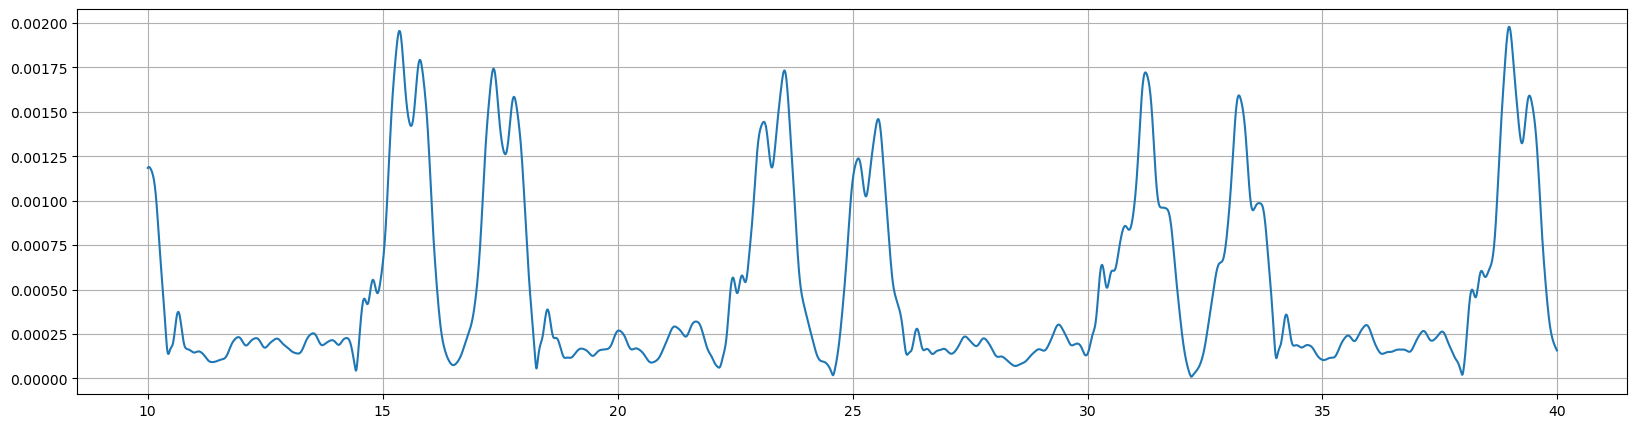

In [133]:
t=np.arange(0,len(q_conv))*10e-3
plt.figure(figsize=(20,5))
plt.plot(t[1000:4000],mag[1000:4000])
plt.grid()
#plt.xlim(20,50)
plt.show()

# change to 4ns

In [120]:
len(waveform[0])

1048940

In [123]:
splitarray=[]
fr=0.2544425
b=100/fr
for i in range(2600):
    a=math.floor(595+i*b)
    c=math.floor(i*0.162)
    chunk=waveform[0][a:a+393]
    chunk[:20]=np.linspace(0,chunk[20],20)
    chunk[-20:]=np.linspace(chunk[-20],0,20)
    splitarray.append(chunk)

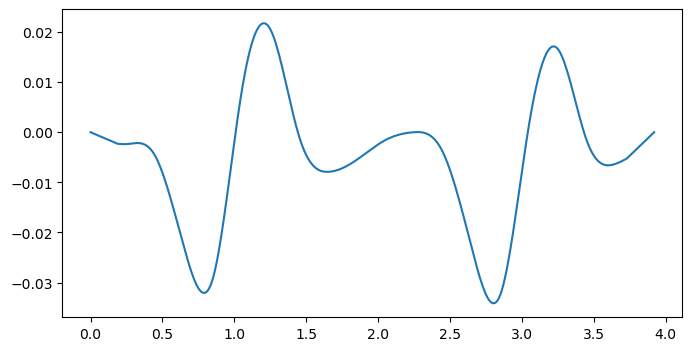

In [124]:
timestep=np.arange(0,len(splitarray[0]))*10e-3
plt.figure(figsize=(8,4))
plt.plot(timestep,splitarray[0])

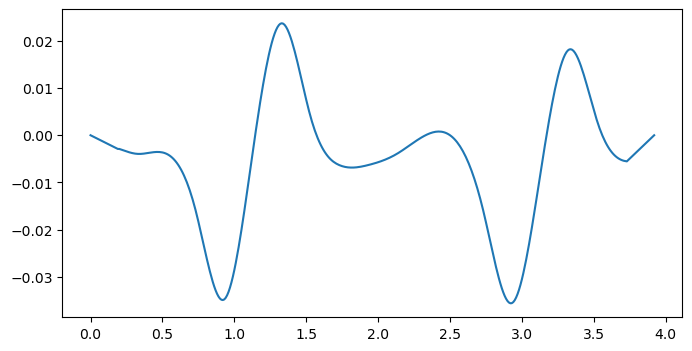

In [125]:
timestep=np.arange(0,len(splitarray[0]))*10e-3
plt.figure(figsize=(8,4))
plt.plot(timestep,splitarray[2000])

In [126]:
concat=[]
for i in range(len(splitarray)):
    if i % 2 ==0:
        concat.append(splitarray[i])

waveform_4ns=np.concatenate(concat,axis=0)

(0.0, 20.0)

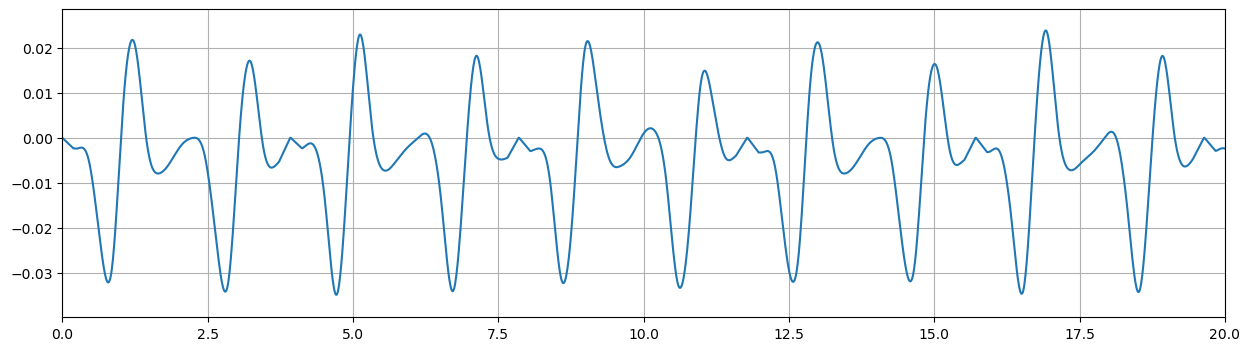

In [129]:
timestep=np.arange(0,len(waveform_4ns))*10e-3
plt.figure(figsize=(15,4))
plt.plot(timestep,waveform_4ns)
plt.grid()
plt.xlim(0,20)

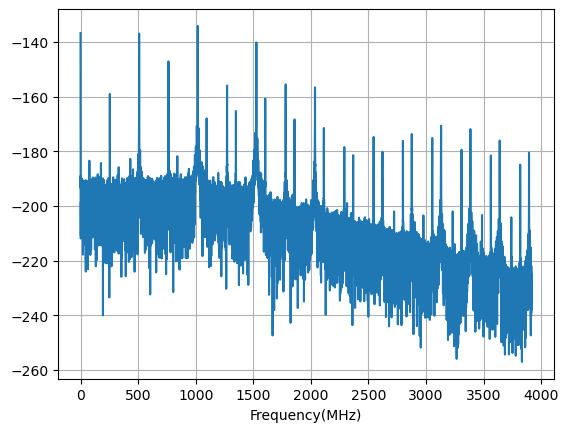

In [128]:
#FFT
size    = len(waveform_4ns) # Number of data points in the file
timeBin = 10E-3 # Unit of ns
freqBin = (0.5E+3/timeBin)/float(size//2) # Units of MHz
freqSteps = np.linspace(0, freqBin*(size//2-1), num=size//2)
freq = np.fft.fft(waveform_4ns)/float(size)
freq = freq[range(size//2)]
mag = 20.0*np.log10(np.abs(freq)/32767.0) # Units of dBFS

plt.plot(freqSteps[0:20000],mag[0:20000])
plt.xlabel("Frequency(MHz)")
plt.grid()